In [4]:
import numpy as np
from numpy.linalg import eigvals
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import LogNorm
from matplotlib.animation import FuncAnimation as FA

plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

In [7]:
c = np.matrix([[.2, .5], [.1, .5]])
x = np.array([-.2, .2])


def f(phi, a):
    mu1 = -2*(phi[0] - c[0,0])*(phi[0] - c[0,1])*(2*phi[0] - c[0,0] - c[0,1]) + (x[0]+a)*phi[1] + 2*x[1]*phi[0]*phi[1]**2
    mu2 = -2*(phi[1] - c[1,0])*(phi[1] - c[1,1])*(2*phi[1] - c[1,0] - c[1,1]) + (x[0]-a)*phi[0] + 2*x[1]*phi[1]*phi[0]**2
    return np.array([mu1, mu2])

D11 = lambda phi, a:\
    -(
        + 2*(phi[0] - c[0, 0])**2 
        + 2*(phi[0] - c[0, 1])**2 
        + 8*(phi[0] - c[0, 0])*(phi[0] - c[0, 1]) 
        + 2*x[1]*phi[1]**2
    )+0j
D22 = lambda phi, a: \
    -(
        + 2*(phi[1] - c[1, 0])**2 
        + 2*(phi[1] - c[1, 1])**2 
        + 8*(phi[1] - c[1, 0])*(phi[1] - c[1, 1])
        + 2*x[1]*phi[0]**2
    )+0j
D12 = lambda phi, a: -((x[0] + a) + 4*x[1]*phi[0]*phi[1])+0j
D21 = lambda phi, a: -((x[0] - a) + 4*x[1]*phi[0]*phi[1])+0j


l1 = lambda phi, a : 1/2 * ( (D11(phi, a) + D22(phi, a)) + np.sqrt((D11(phi, a) - D22(phi, a))**2 + 4*D12(phi, a)*D21(phi, a) ) )
l2 = lambda phi, a : 1/2 * ( (D11(phi, a) + D22(phi, a)) - np.sqrt((D11(phi, a) - D22(phi, a))**2 + 4*D12(phi, a)*D21(phi, a) ) )

def Cr (x, a): 
    C = np.logical_and(l1(x, a).real>0, l1(x, a).real>0)
    return np.ma.masked_where(C==0, C)

def Ci (x, a):
    C = l1(x, a).imag
    return np.ma.masked_where(C==0, C)

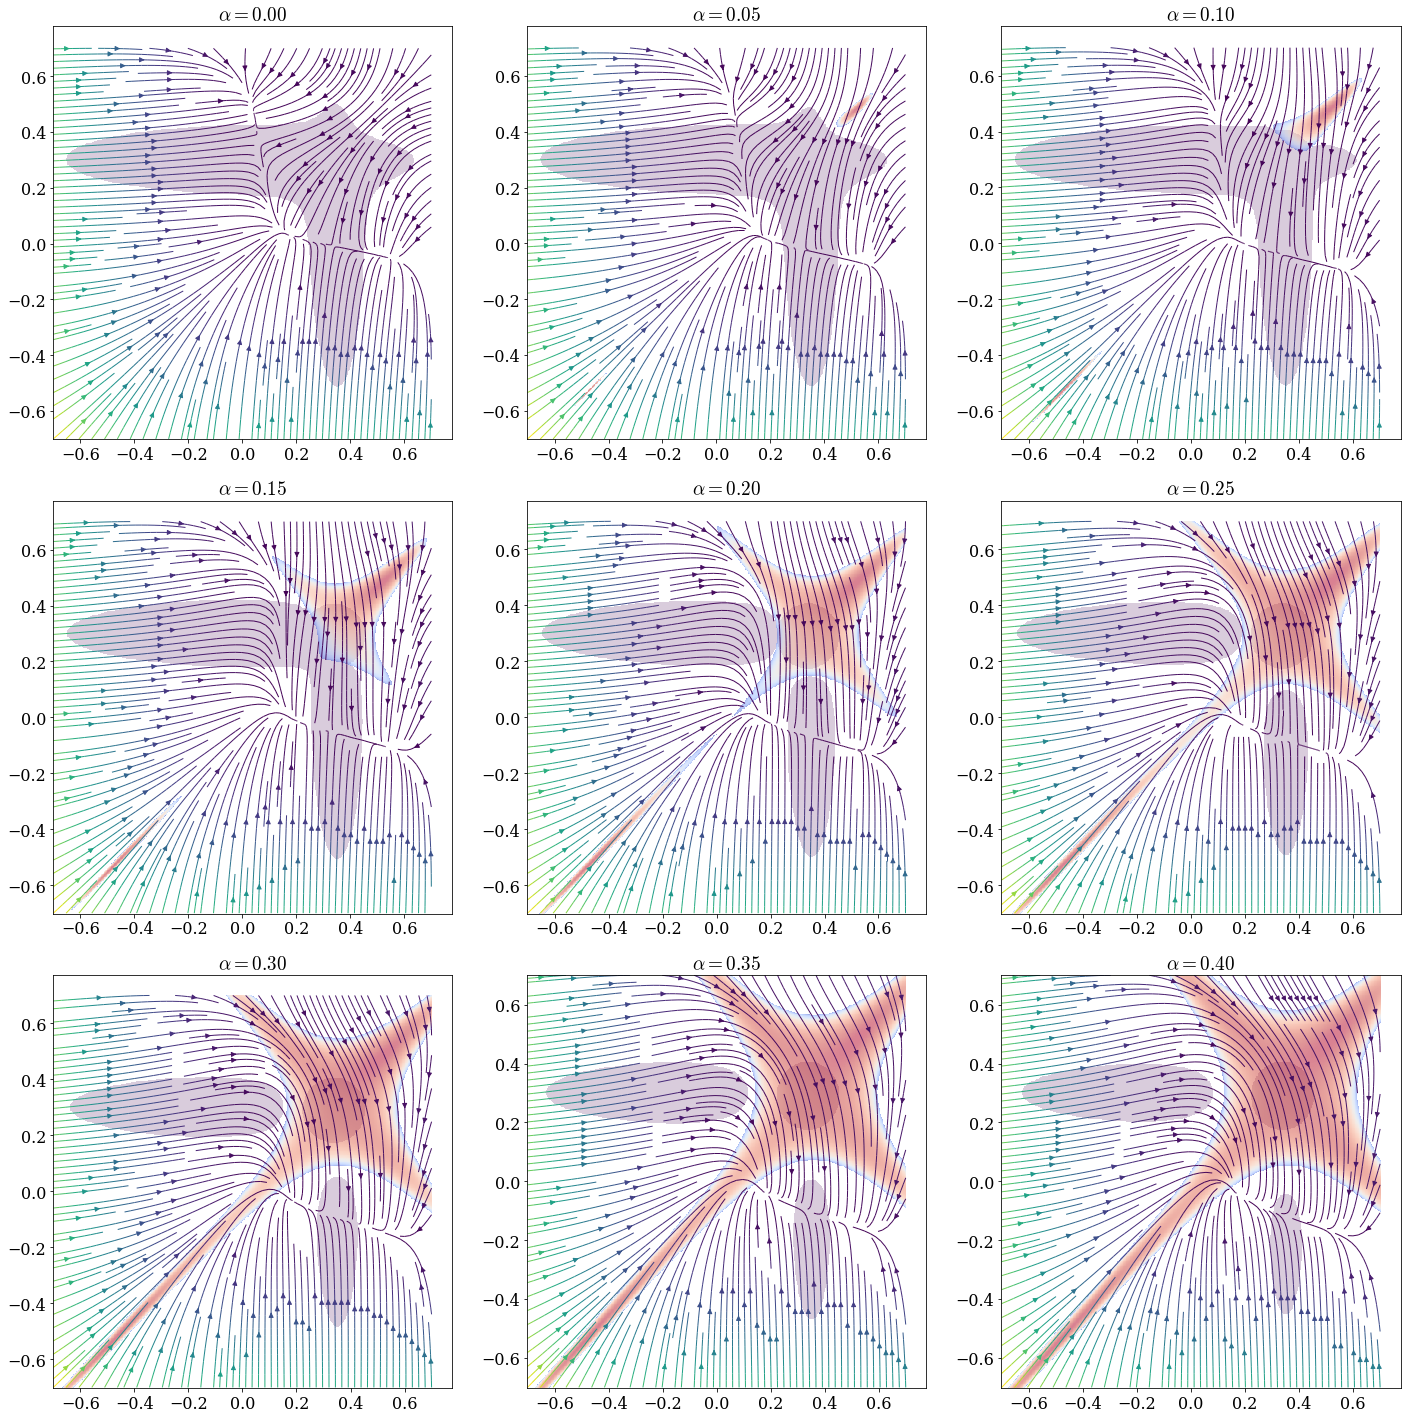

In [11]:
n = 500
a = .7
x1, x2 = np.linspace(-a, a, n), np.linspace(-a, a, n)
x1, x2 = np.meshgrid(x1, x2)

aa = np.linspace(0, .4, 9)
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

for n, a in enumerate(aa):
    xs = [x1, x2]
    u, v = f([x1, x2], a )
    l = np.sqrt( u**2 + v**2)
    ax[n//3, n%3].pcolormesh(x1, x2, Cr(xs, a), alpha=.2)
    ax[n//3, n%3].pcolormesh(x1, x2, Ci(xs, a), alpha=.5, cmap='coolwarm')
    ax[n//3, n%3].streamplot(x1, x2, u, v, color=l, density=2., linewidth=1)
    ax[n//3, n%3].set_title("$\\alpha={:.2f}$".format(a))
plt.tight_layout()